In [1]:
using ForwardDiff, Random, Printf, Plots, LinearAlgebra

**Write a function `fixed_point(f::Function, x0::Float64)` which computes the fixed point of f starting from initial point x0.**

$\textrm{\textbf{\color{red} \underline{Fixed point :}}}$
- $x_{n+1} = f(x_n)$

In [2]:
function fixed_point(f::Function, x_0::Float64; N::Int=1000, τ_ϵ = 10^(-15))

    x_L = Float64[]
    push!(x_L,x_0)

    for i in 1:N
        x_0 = f(x_0)
        push!(x_L,x_0)
    end

    return (;x=x_0,ϵ=abs(f(x_0)-x_0), N, x_L) 
end

fixed_point (generic function with 1 method)

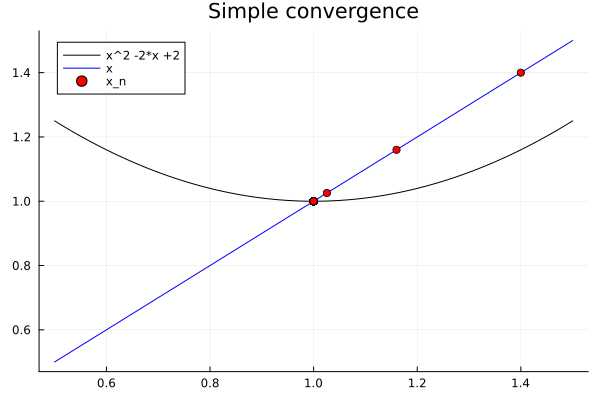

In [3]:
f_test_1(x) = x^2 -2*x +2
fp1 = fixed_point(f_test_1, 1.4).x_L
plot(range(0.5, 1.5, length=100), f_test_1.(range(0.5, 1.5, length=100)), label="x^2 -2*x +2", color="black", title="Simple convergence")
plot!(range(0.5, 1.5, length=100),range(0.5, 1.5, length=100), label="x", color="blue")
scatter!(fp1,fp1, mc="red", label="x_n")

**Write a function `bisection(f::Function, a::Float64, b::Float64)` which computes a zero of function f within (a,b) using a bisection method.**

$\textrm{\textbf{\color{red} \underline{Bisection - find zero :}}}$
- Find $x \in [a,b]$ such that $f(x) = 0$
- **>> Assume** $f(a)f(b) <0$ 
- Algorithm
  1. Start with $a_n, b_n$. Set $c_n=(a_n+b_n)/2$
  2. Compute $f(c_n)$
    - if $f(c_n)f(a_n)<0$ then set $(a_{n+1},b_{n+1})=(a_n,c_n)$
    - else set $(a_{n+1},b_{n+1})=(c_n,b_n)$
  3. If $|f(c_n)|<\epsilon$ and/or $\frac{b-a}{2^n}<\delta$ stop. Otherwise go back to 1.

In [4]:
function bisection(f::Function, a::Float64, b::Float64; N::Int=100, τ_δ=10^(-15))

    try
        @assert f(a)*f(b)<0
    catch AssertionError
        return "f(a)*f(b)<0 condition is not verified"
    end

    a_L = Float64[]
    b_L = Float64[]
    push!(a_L,a)
    push!(b_L,b)
    c_L = Float64[]
    local c
    for i in 1:N
        c = (a+b)/2
        push!(c_L,c)

        if f(a)*f(c)>0
            a=c
            b=b
            push!(a_L,a)
            push!(b_L,b)
        else
            a=a
            b=c
            push!(a_L,a)
            push!(b_L,b)
        end
    end
    
    if abs(b-a)<τ_δ
        return (;c=c, a_L=a_L, b_L=b_L, c_L=c_L)
    else 
        return "No convergence"
    end
end

bisection (generic function with 1 method)

┌ Info: Saved animation to /var/folders/5f/1t5lz7t9659g_zvqs5c0tx180000gn/T/jl_xIJWZIT4vi.gif
└ @ Plots /Users/prld/.julia/packages/Plots/a3u1v/src/animation.jl:156


Plots.AnimatedGif("/var/folders/5f/1t5lz7t9659g_zvqs5c0tx180000gn/T/jl_xIJWZIT4vi.gif")
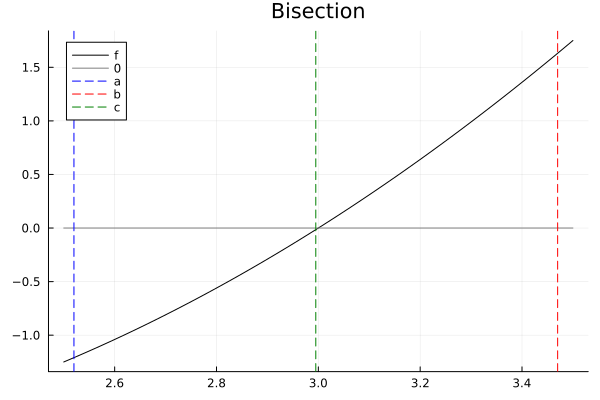

In [5]:
f_test_2(x) = x^2 - 3x

n_iterr = 50
bisec = bisection(f_test_2, 2.52, 3.47, N=n_iterr)

anim = Animation()
for i in range(1,5)
    plot(range(2.5, 3.5, length=100), f_test_2.(range(2.5, 3.5, length=100)), title="Bisection", color="black", legend=:topleft, label="f")
    plot!(range(2.5, 3.5, length=100),[0 for i in range(2.5, 3.5, length=100)], color="gray", line=(:line, 1), label="0")
    vline!([bisec.a_L[i]], label= "a",line=(:dash, 1), color="blue")
    vline!([bisec.b_L[i]], label= "b",line=(:dash, 1), color="red")
    vline!([bisec.c_L[i]], label= "c",line=(:dash, 1), color="green")
    frame(anim)
end
#* ===========
gif(anim, fps = 1)

**Write a function `golden(f::Function, a::Float64, b::Float64)` which computes a zero of function f within (a,b) using a golden ratio method.**

$\textrm{\textbf{\color{red} \underline{Golden ratio / Golden section search : find zero}}}$

- Minimize $f(x)$ for  $x \in [a,b]$
- Choose $\Phi \in [0,0.5]$ or $\Phi=\frac{\sqrt{5}-1}{2}$ golden ratio

- Algorithm:
  - start with $a_n < b_n$ (initially equal to $a$ and $b$)
  - define $c_n = a_n+\Phi(b_n-a_n)$ and $d_n = a_n+(1-\Phi)(b_n-a_n)$
    - if $f(c_n)<f(d_n)$ set $a_{n+1},b_{n+1}=a_n, d_n$
    - else set $a_{n+1}, b_{n+1}= c_n, b_n$

In [6]:
function golden(f::Function, a::Float64, b::Float64; φ=(sqrt(5)-1)/2, N::Int=100, τ_δ=10^(-15))
    '''
    φ ∈ [0,0.5]
    '''
    a_L = Float64[]
    b_L = Float64[]
    push!(a_L,a)
    push!(b_L,b)
    c_L = Float64[]
    local c,d
    for i in 1:N
        c = a + φ*(b-a)
        d = a + (1-φ)*(b-a)
        fc = f(c)
        fd = f(d)
        if f(c)<f(d)
            a=a
            b=d
            push!(a_L,a)
            push!(b_L,b)
        else
            a=c
            b=b
            push!(a_L,a)
            push!(b_L,b)
        end
    end

    if (b-a)<τ_δ
        return (;c=c,d=d, a_L=a_L, b_L=b_L)
    else
        return "No convergence"
    end
end

golden (generic function with 1 method)

**Write a function `zero_newton(f::Function, x0::Float64)` which computes the zero of function f starting from initial point x0.**

$\textrm{\textbf{\color{red} \underline{Newton : find zero}}}$

In [7]:
function zero_newton(f::Function, x_0::Float64; N::Int=20, τ_ϵ=10^(-15))

    x_L = Float64[]
    push!(x_L,x_0)
    ϵ = abs(f(x_0))

    for i in 1:N
        x_0 = x_L[end]
        df = ForwardDiff.derivative(f,x_0)
        x_0 = x_0 - f(x_0)/df
        push!(x_L,x_0)
        ϵ = abs(f(x_0))
    end

    if ϵ<τ_ϵ
        return (;x=x_0, x_L, ϵ, N)
    else
        return "No convergence"
    end
end

zero_newton (generic function with 1 method)

┌ Info: Saved animation to /var/folders/5f/1t5lz7t9659g_zvqs5c0tx180000gn/T/jl_puhyhCB4BO.gif
└ @ Plots /Users/prld/.julia/packages/Plots/a3u1v/src/animation.jl:156


Plots.AnimatedGif("/var/folders/5f/1t5lz7t9659g_zvqs5c0tx180000gn/T/jl_puhyhCB4BO.gif")
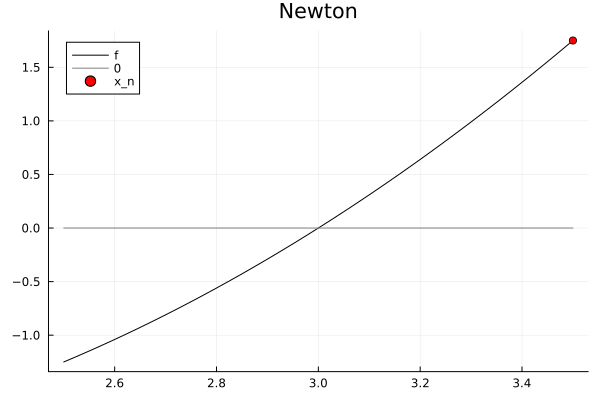

In [8]:
newt = zero_newton(f_test_2, 3.5)

anim = Animation()
for i in range(1,3)
    plot(range(2.5, 3.5, length=100), f_test_2.(range(2.5, 3.5, length=100)), title="Newton", color="black", legend=:topleft, label="f")
    plot!(range(2.5, 3.5, length=100),[0 for i in range(2.5, 3.5, length=100)], color="gray", line=(:line, 1), label="0")
    scatter!((newt.x_L[i],f_test_2(newt.x_L[i])),mc="red",label="x_n")
    frame(anim)
end
#* ===========
gif(anim, fps = 1)

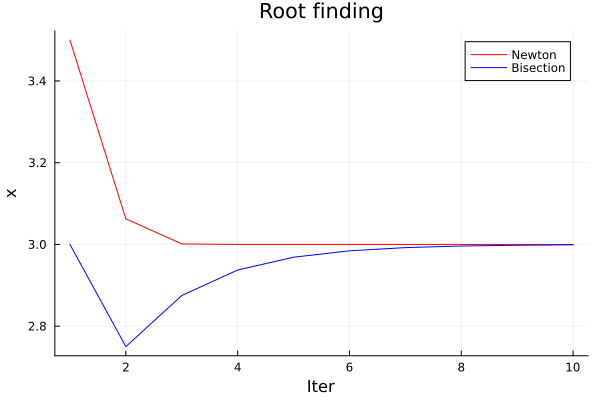

In [9]:
plot(zero_newton(f_test_2, 3.5).x_L[1:10],color="red",label="Newton",title="Root finding",xaxis="Iter",yaxis="x")
plot!(bisection(f_test_2, 2.5, 3.5, N=100).c_L[1:10],color="blue",label="Bisection")

**Add an option `zero_newton(f::Function, x0::Float64, backtracking=true)` which computes the zero of function f starting from initial point x0 using backtracking in each iteration.**

$\textrm{\textbf{{\color{red}\underline{Newton zero \& Backtraking}}}}$

**Let $\beta \in (0,1)$ and $\Delta x = - f(x)/f'(x)$ be the *direction* :**

- $t_k = \beta^{k} \in \mathbf{R}$
- **Iterate over k until :** $| f(x+t_k\Delta x) | < | f(x) | $
- **If k=0 works -> standard Newton iteration**

Used to avoid large derivations of Newton from the target 

In [10]:
function zero_newton(f::Function, x_0::Float64, backtracking=true; N=100, τ_ϵ=10^(-15))

    β = 0.5
    K_max = 10

    x_L = Float64[]
    push!(x_L,x_0)
    ϵ = abs(f(x_0))

    for i in 1:N
        x = x_L[end]
        df = ForwardDiff.derivative(f,x)
        Δx = -f(x)/df   # direction # multidim : Δx = - ForwardDiff.jacobian( u-> f(u), x) \ f(x)
        #! ---------------------------
        k = 0
        not_min = true
        while (k<=K_max) && (not_min)
            t_k = β^k
            x_t = x + t_k*Δx
            # ! | f(x+t_k.Delta x) | < | f(x) |
            if abs(f(x_t)) <= abs(f(x))
                not_min = false
                push!(x_L, x_t)
                ϵ = abs(f(x_t))
            end
            k+=1
        end
        #! ---------------------------
    end

    if ϵ<τ_ϵ
        return (;x=x_L[end], x_L, ϵ, N)
    else
        return "No convergence"
    end
end

zero_newton (generic function with 2 methods)

In [11]:
methods(zero_newton)

# 2 methods for generic function "zero_newton" from Main:
 [1] zero_newton(f::Function, x_0::Float64, backtracking; N, τ_ϵ)
     @ ~/git/NUM3A/Pushups/Pushup_2.ipynb:1
 [2] zero_newton(f::Function, x_0::Float64; ...)
     @ ~/git/NUM3A/Pushups/Pushup_2.ipynb:1

**Write a function `min_gd(f::Function, x0)` which computes the minimum of function f using gradient descent.**

In [17]:
function min_gd(f::Function, x0::Union{Float64,Vector{Float64}}; N=100, λ=0.1, τ_δ=10^(-15))
    '''
    f : R^p -> R
    '''
    
    local δ
    x_L = []Float64
    δ_L = []Float64
    push!(x_L,x0)

    d_f = Dict("Scalar"=> (x-> ForwardDiff.derivative(u->f(u),x)), "Vector"=>(x-> ForwardDiff.jacobian(u->f(u),x)))
    if typeof(x0) == Vector{Float64}
        df = d_f["Vector"]
    elseif typeof(x0) == Float64
        df = d_f["Scalar"]
    else
        return "x0 not Scalar or Vector"
    end

    for i in 1:N
        df_x0 = df(x0)
        x1 = x0 - λ.df_x0
        push!(x_L,x1)
        δ = abs(x1-x0)
        push!(δ_L,δ)
        x0 = x1
    end

    if δ<τ_δ
        return (;x=x0, x_L=x_L, δ_L=δ_L)
    else
        return "No convergence"
    end
end

min_gd (generic function with 1 method)

In [45]:
f_test_3(x) = [x^2 ; x+1]
ForwardDiff.derivative(u->f_test_3(u),2.0)

2-element Vector{Float64}:
 4.0
 1.0

$\textrm{\textbf{{\color{red}\underline{Minimization problem - Backtraking Armijo Line Search}}}}$

**Let $\alpha \in (0,1/2)$, $\beta \in (0,1)$ and $\Delta x$ be the *direction* :**

- $t_k = \beta^{k} \in \mathbf{R}$
- **Iterate over k until :** $f(x+t_k\Delta x) < f(x) + \alpha \nabla f(x)^{T} t_k\Delta x$

$\color{blue} \textrm{Armijo condition : the reduction in f be at least a fraction } \alpha \text{ of the reduction promised by the first-order Taylor approximation of f in x}$

<div>
<img src="./img/backtraking.png" width="500"/>
</div>

In [ ]:
#! ---------------------
k = 0
not_min = true
while (k<=K_max) || (not_min)
    t_k = β^k
    x_t = x + t_k
    if f(x_t) < f(x) + α*df*Δx*t_k
        not_min = false
    end
end
#! ---------------------

verbose = true

dans la boucle 

" verbose ? (do something if true) : (do something else if false) "

**Write a function `min_nr(f::Function, x0::Float64)` which computes the minimum of function f using Newton-Raphson method. Assume f returns a scalar, a gradient, and a hessian.**

<div>
<img src="./img/Newton_Raphson.png" width="500"/>
</div>

In [36]:
# Newton-Raphson minimization : each step minimize the local second order approximation

function min_NR(f::Function, x0::Union{Vector,Float64}; N=100, λ=0.1, τ_δ=10^(-15))
    '''
    f : R^p -> R
    '''

    local δ
    x_L = []Float64
    push!(x_L,x0)

    d_f = Dict("Scalar"=> (x-> ForwardDiff.derivative(u->f(u),x)), "Vector"=>(x-> ForwardDiff.gradient(u->f(u),x)))
    dd_f = Dict("Scalar"=> (x-> ForwardDiff.derivative(u->df["Scalar"](u),x)), "Vector"=>(x-> ForwardDiff.hessian(u->f(u),x)))

    if typeof(x0) == Vector{Float64}
        df = d_f["Vector"]
        ddf = dd_f["Vector"]
    elseif typeof(x0) == Float64
        df = d_f["Scalar"]
        ddf = dd_f["Scalar"]
    else
        return "x0 not Scalar or Vector"
    end
    
    for i in 1:N
        df_x0 = df(x0)
        ddf_x0 = ddf(x0)
        x1 = x0 - ddf_x0 \ df_x0
        push!(x_L,x1)
        δ = abs(x1 - x0)
        x0 = x1
    end
end

min_NR (generic function with 1 method)

**Write a method `zero_newton(f::Function, x0::Vector{Float64})` which computes the zero of a vector valued function f starting from initial point x0.**

$\textrm{\textbf{{\color{red}\underline{Newton Zero}}}} \quad f:\mathbf{R^p} \rightarrow \mathbf{R^q} : \qquad X_{n+1} = X_n - [J(x_n)]^{-1}f(x_n)$

In [ ]:
function zero_newton(f::Function, x0::Vector{Float64}; N=20)

    local x1
    for i in 1:N
        jacques = ForwardDiff.jacobian( u-> f(u), x0)
        x1 = x0 - jacques \ f(x0)
        x0 = x1
    end
    return x1

end

**Add an method `zero_newton(f::Function, x0::Vector{Float64}, backtracking=true)` which computes the zero of function f starting from initial point x0 using backtracking in each iteration.**

In [46]:
function zero_newton(f::Function, x_0::Vector{Float64}, backtracking=true; N=100, τ_ϵ=10^(-15))

    β = 0.5
    K_max = 10

    x_L = Float64[]
    push!(x_L,x_0)
    ϵ = abs(f(x_0))

    for i in 1:N
        x = x_L[end]
        df = ForwardDiff.jacobian(f,x)
        Δx = - df \ f(x) 
        #! ---------------------------
        k = 0
        not_min = true
        while (k<=K_max) && (not_min)
            t_k = β^k
            x_t = x + t_k*Δx
            # ! | f(x+t_k.Delta x) | < | f(x) |
            if sum(abs.(f(x_t))) <= sum(abs.(f(x)))
                not_min = false
                push!(x_L, x_t)
                ϵ = sum(abs.(f(x_t)))
            end
            k+=1
        end
        #! ---------------------------
    end

    if ϵ<τ_ϵ
        return (;x=x_L[end], x_L, ϵ, N)
    else
        return "No convergence"
    end
end

zero_newton (generic function with 4 methods)

**Add a method `zero_newton(f::Function, x0::Vector{Float64}, backtracking=true, lb=Vector{Float64})` which computes the zero of function f starting from initial point x0 taking complementarity constraint into account x>=lb using the Fischer-Burmeister method.**